## Увеличения выручки интернет-магазина.
Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать его результаты. 

#### Оглавление:

1. [Импорт библиотек, загрузка данных, знакомство с данными и предобработка.](#start)
2. [Приоритизация гипотез методами ICE и RICE.](#step_two)
3. [Анализ A/B-теста.](#step_three)
    * 3.1. [График кумулятивной выручки по группам.](#step_three_1) 
    * 3.2. [График кумулятивного среднего чека по группам.](#step_three_2)
    * 3.3. [График кумулятивного среднего количества заказов на посетителя по группам.](#step_three_3)
    * 3.4. [Точечные графики количества заказов по пользователям и стоимостей заказов, определение аномалий.](#step_three_4) 
4. [Статистические тесты. A/B-тест.](#step_four)
    * 4.1. [Статистическая значимость различий в среднем количестве заказов на посетителя между группами.](#step_four_1)
    * 4.2. [Статистическая значимость различий в среднем чеке заказов между группами.](#step_four_2)
    * 4.3. [Статистическая значимость различий в среднем количестве заказов на посетителя между группами (очищенные данные).](#step_four_3)
    * 4.4. [Статистическая значимость различий в среднем чеке заказов между группами (очищенные данные).](#step_four_4)
5. [Выводы по работе.](#step_five)

### 1. Импорт библиотек, загрузка данных, знакомство с данными и предобработка. <a id="start"></a> 

In [1]:
import numpy as np
from datetime import datetime as dt, timedelta
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings; warnings.filterwarnings(action='once')
warnings.filterwarnings("ignore")

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.5.2
0.11.2


In [2]:
pd.set_option('display.max_colwidth', False)

In [3]:
try: 
    hypothesis = pd.read_csv('C:/Users/USER/Desktop/hypothesis.csv')
except FileNotFoundError:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Посмотрим данные во втором файле и где нужно исправим:

In [7]:
try: 
    orders = pd.read_csv('C:/Users/USER/Desktop/orders.csv')
except FileNotFoundError:
    orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В файле 1197 строк, 5 колонок, в колонках не наблюдаются пропуски. Наименование колонок "удобное". Типы данных в колонках в целом верные, кроме колонки date.

В датафрейме неверно указан тип данных даты и времени, измениим его:

In [9]:
orders['date'] = pd.to_datetime(orders['date'])

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [11]:
orders.duplicated().sum()

0

Дубликатов нет.

Посмотрим 3 файл:

In [12]:
try: 
    visitors = pd.read_csv('C:/Users/USER/Desktop/visitors.csv')
except FileNotFoundError:
    visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В файле неверный тип данных в колонке с датой, исправим это:

In [14]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
visitors.duplicated().sum()

0

Дубликатов нет.

Данные загрузили, ознакомились с ними, предобработали. Изучим их более детально, для этого посмотрим сколько групп есть в A/B-тесте, даты начала и окончания теста, есть ли пользователи, которые попали сразу в обе группы теста.

In [17]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [18]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

Во всех файлах аудитория разбита на 2 группы.

Посмотрим, есть ли у нас пользователи, которые попали сразу в 2 группы теста:

In [19]:
t = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index()
t = t.query('group >= 2')
t['visitorId'].count()

58

In [20]:
orders['visitorId'].nunique()

1031

In [21]:
58 / 1031 * 100

5.625606207565471

Достаточно большое количество клиентов смешались. Оставлять все так и смотреть на результаты теста будет некорректно. Я удалю таких пользователей из датафрейма, но необходимо поговорить с разработчиками, чтобы сократить до минимума таких клиентов или убрать вовсе, потому что 5.6% - это много. Так же стоит учитывать, что удаление таких пользователей повлияет на конверсию, поскольку мы можем удалить этих пользователей из таблицы с заказами, но не сможем удалить из таблицы с визитами, поскольку там данные уже агрегированы за день.

In [22]:
t = t['visitorId']

In [23]:
orders = orders.query('visitorId not in @t')

Очистили данные от клиентов, попавших в обе группы.

Посмотрим на начало и конец теста.

In [24]:
print(orders['date'].min(), '- начало')
print(orders['date'].max(), '- конец')

2019-08-01 00:00:00 - начало
2019-08-31 00:00:00 - конец


In [25]:
print(visitors['date'].min(), '- начало')
print(visitors['date'].max(), '- конец')

2019-08-01 00:00:00 - начало
2019-08-31 00:00:00 - конец


Тест длился месяц. Периоды начала и конца в файлах совпадают.

### 2. Приоритизация гипотез методами ICE и RICE. <a id="step_two"></a> 

В файле hypothesis хранятся гипотезы и числовые значения показателей этих гипотез. Обработаем эти данные и выберем самую приоритетную гипотезу. Рассматриать гипотезы будет 2 методами приоритизации: ICE и RICE. 

In [26]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [27]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [28]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [29]:
hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending=False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [30]:
hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending=False).round(2)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Видим, что приоритизация гипотез в разных методах отличается, это связано с тем, что фреймворк RICE состоит из четырёх компонент:
1. Reach — скольких пользователей затронет изменение, которое вы хотите внести;
2. Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
3. Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
4. Efforts — сколько стоит протестировать эту гипотезу. 

А метод ICE не учитывает значение reach, поэтому значения отличаются. Вообще, если есть параметр reach (мы смогли его оценить), лучше использовать метод RICE, так как он является усовершенствованной версией ICE.

### 3. Анализ A/B-теста. <a id="step_three"></a>

##### 3.1. Для начала построим график кумулятивной выручки по группам и сделаем выводы: <a id="step_three_1"></a>

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


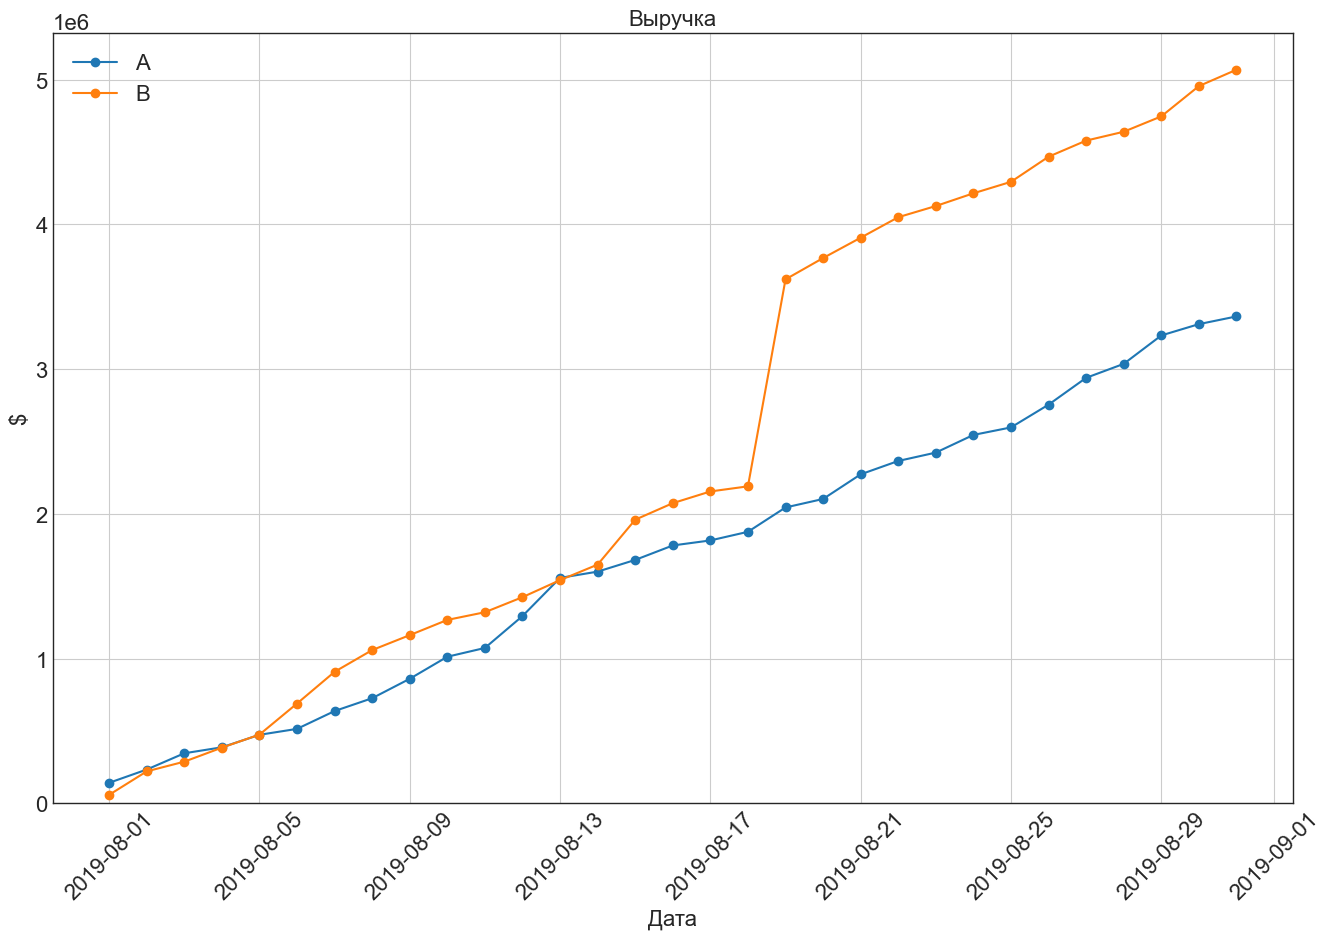

In [32]:
# Строим график выручки группы А
plt.plot(data['date'], data['revenueCummulativeA'], 'o-', label='A')

# Строим график выручки группы B
plt.plot(data['date'], data['revenueCummulativeB'], 'o-', label='B')
plt.ylabel('$')
plt.xlabel('Дата')
plt.title('Выручка')
plt.ylim(bottom=0)
plt.legend() 
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

Выручка равномерно увеличивается в течение всего теста. Однако график выручки группы В имеет резкий рост в промежутке между 17 и 21 августа, после чего также равномерно растет, сильно опережая группу А. Этот резкий рост может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Данные аномалии необходимо изучить и в случае необходимости исключить из исследования.

Построим график относительного различия кумулятивной выручки.

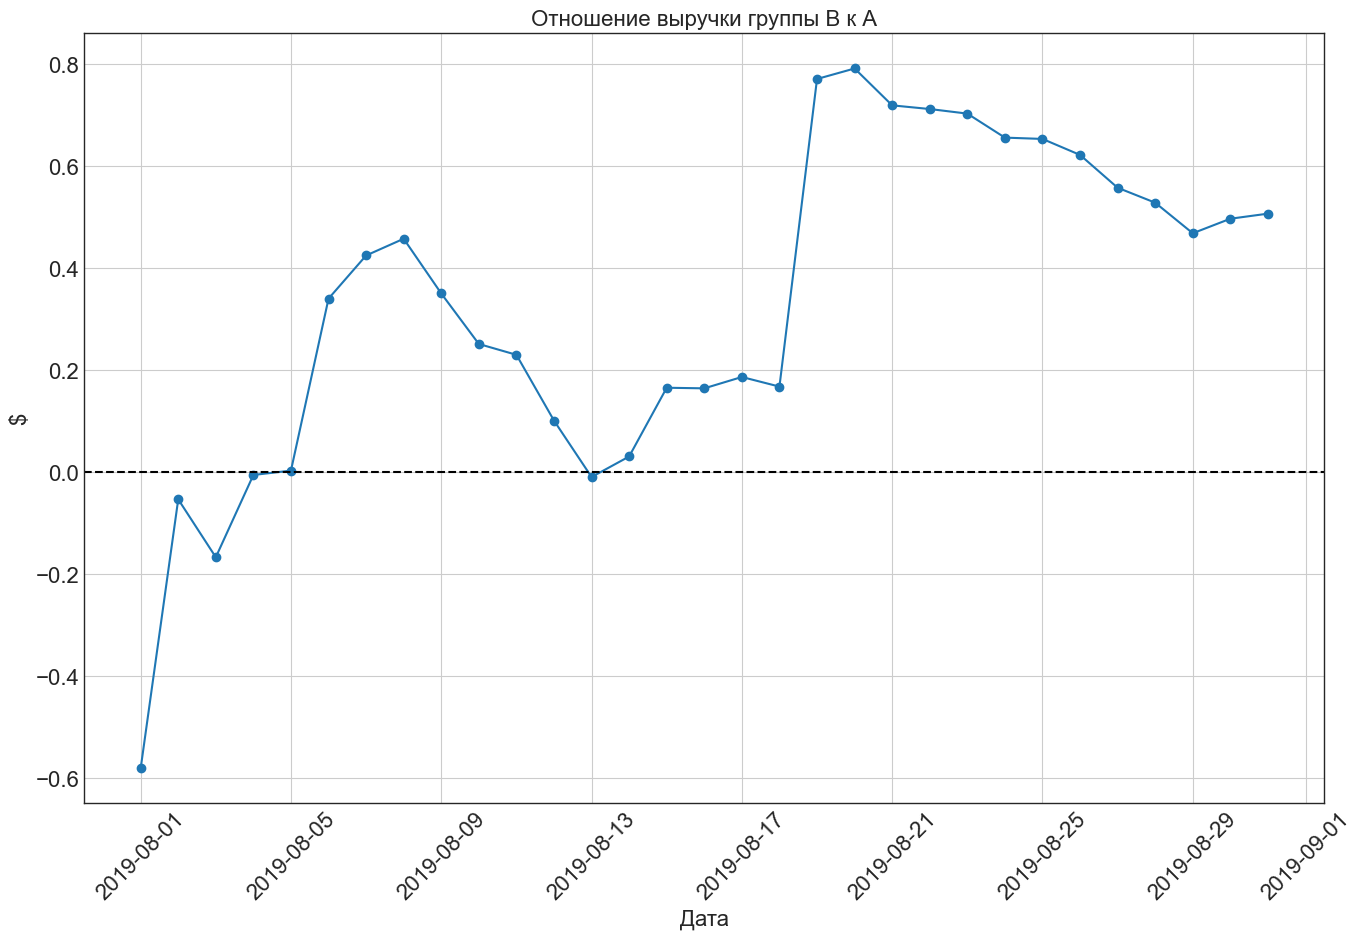

In [33]:
# cтроим график
plt.plot(data['date'], data['revenueCummulativeB']/data['revenueCummulativeA']-1, 'o-')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('$')
plt.xlabel('Дата')
plt.title('Отношение выручки группы В к А')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Где-то спрятались крупные заказы и выбросы. В целом же выручка группы В практически на всем периоде теста опережала выручку группы А. К концу исследования графики стали более стабильными и устойчивыми - можем заявить, что данных наблюдений (даже без очистки от выбросов) достаточно для того, чтобы сделать вывод о том, что выручка группы В опережает выручку группы А. Но тем не менее, мы все-равно исключим из данных аномалии и снова посмотрим на графики, чтобы оценить изменения.

<div style="border:solid Chocolate 2px; padding: 40px">

Я не стану сразу удалять аномалии и сторить новые графики, так как нам необходимо построить графики еще нескольких метрик. Сначала построим графики всех метрик по сырым данным, а потом очистим их и построим все графики по отфильтрованным данным.

##### 3.2. Построим график кумулятивного среднего чека по группам и сделаем выводы: <a id="step_three_2"></a>

Разделим кумулятивную выручку на кумулятивное число заказов

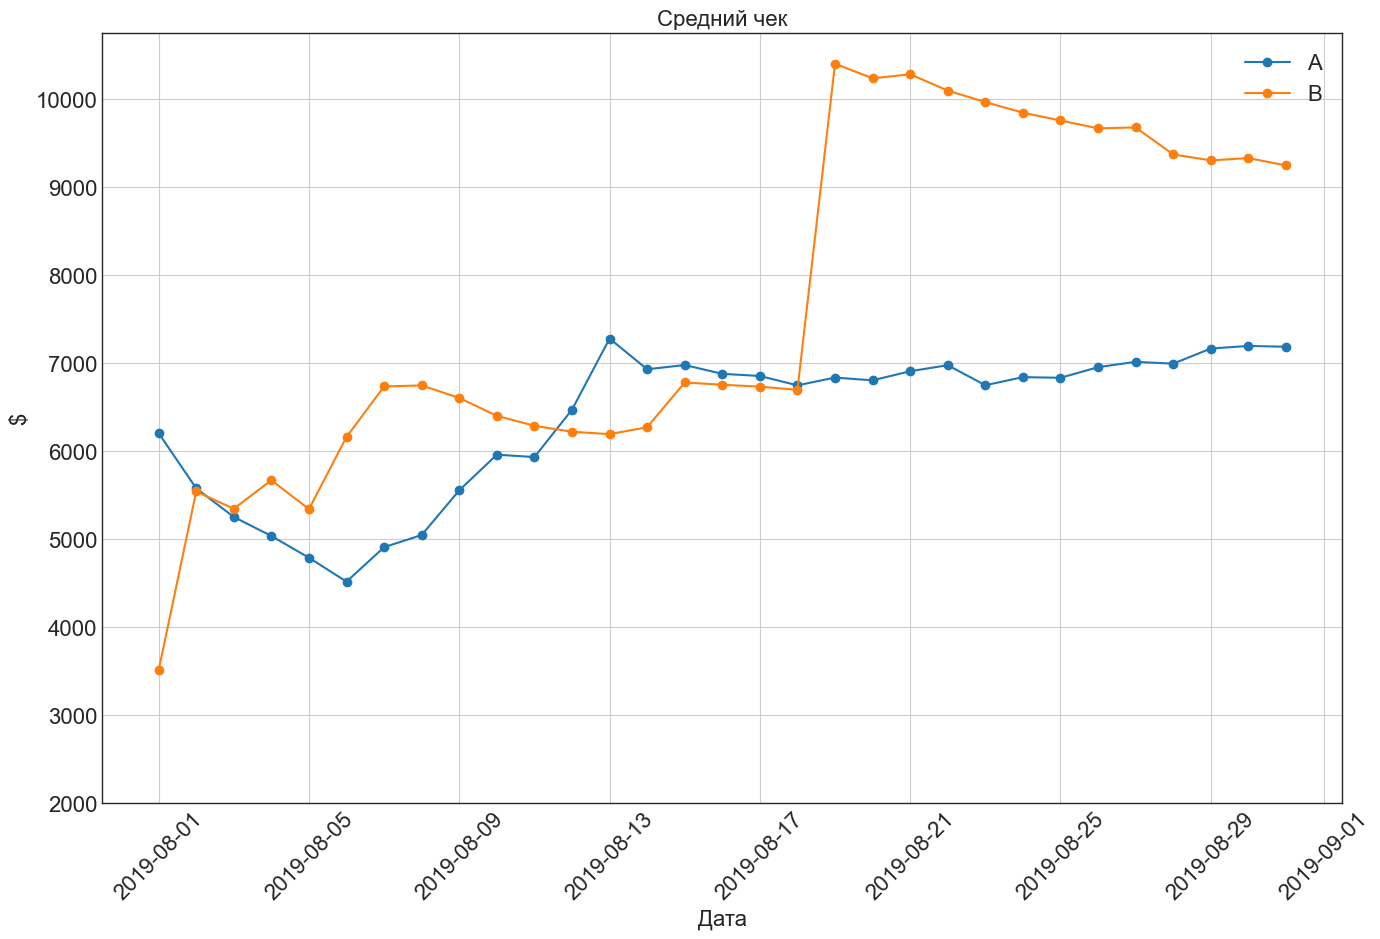

In [34]:
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], 'o-', label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], 'o-', label='B')
plt.ylabel('$')
plt.xlabel('Дата')
plt.title('Средний чек')
plt.ylim(bottom=2000)
plt.legend() 
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

На графиках видно резкие скачки. График среднего чека группы A выглядит более равномерным ближе к концу теста, можно сказать, что он установился. А для группы В график продолжает падать после резкого скачка. Скачок, скорее всего, вызван аномалиями. Удалим их и посмотрим на график снова. Пока же средний чек группы В не выглядит равномерным (в него попали аномальные заказы), а значит нельзя сказать что он установился. Возможно, нужно больше данных, чтобы группе В прийти к реальному среднему чеку и установиться на его уровне. А значит придется продлить тест.

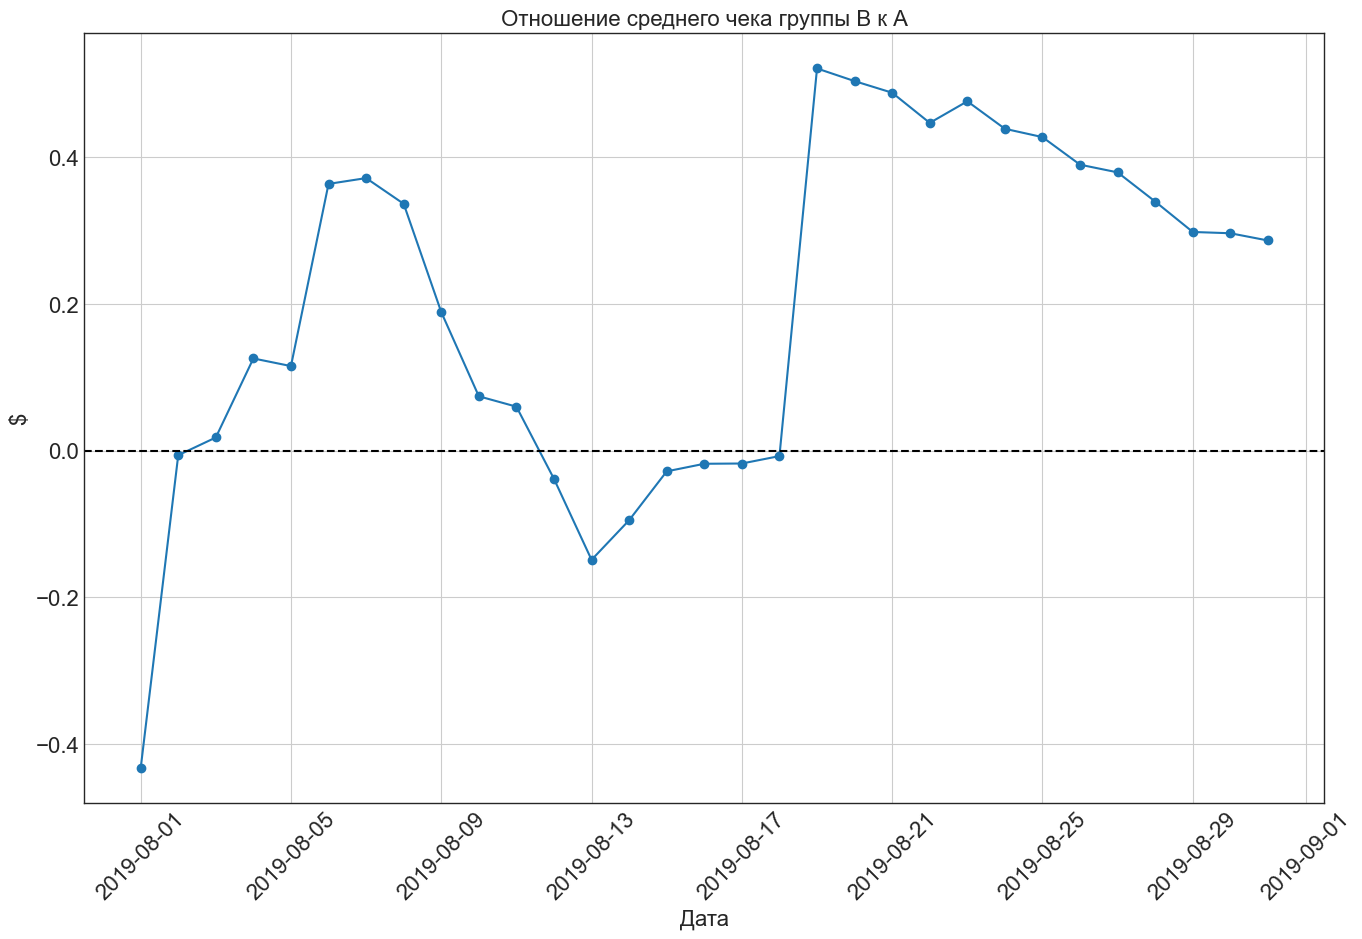

In [35]:
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1, 'o-')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('$')
plt.xlabel('Дата')
plt.title('Отношение среднего чека группы В к А')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

В некоторых местах график скачет. Тем не менее в основном, средний чек группы В выше группы А.

##### 3.3. Построим график кумулятивного среднего количества заказов на посетителя по группам и сделаем выводы: <a id="step_three_3"></a>

Среднее количества заказов на посетителя по группам - это количество заказов поделенное на количество посетителей по группам.

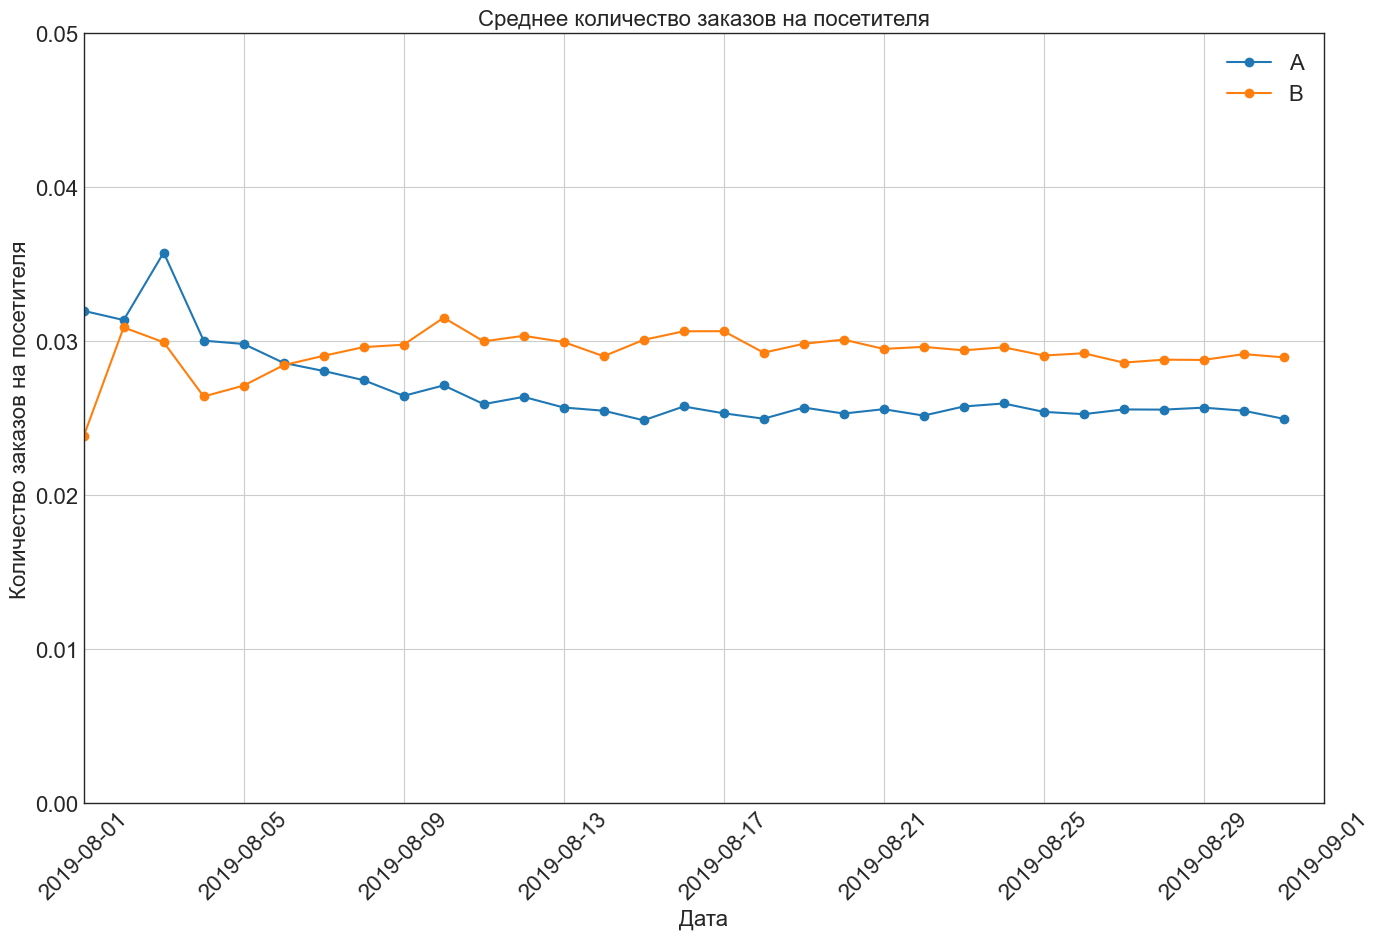

In [36]:
plt.plot(data['date'], data['ordersCummulativeA']/data['visitorsCummulativeA'], 'o-', label='A')
plt.plot(data['date'], data['ordersCummulativeB']/data['visitorsCummulativeB'], 'o-', label='B')
plt.ylabel('Количество заказов на посетителя')
plt.xlabel('Дата')
plt.title('Среднее количество заказов на посетителя')
plt.legend()
plt.axis([dt(2019, 8, 1), dt(2019, 9, 1), 0, 0.05])
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

Группы колебались около одного значения, но затем среднее количество заказов на посетителя группы В вырвалось вперёд и зафиксировалась, а среднее количество заказов на посетителя группы А просело и также зафиксировалась. Посмотрим на относительный график.

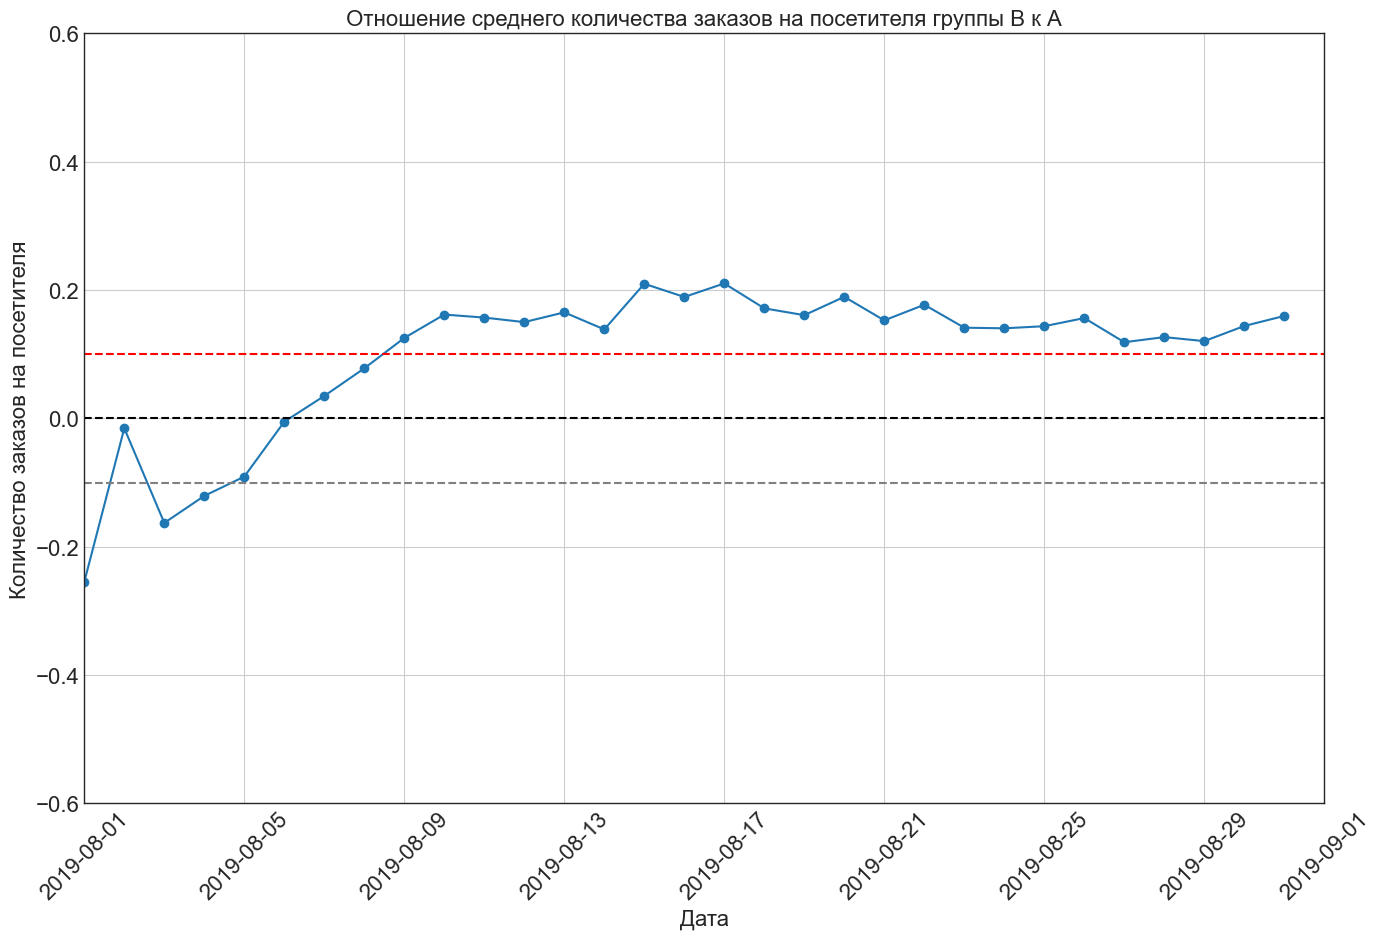

In [37]:
plt.plot(data['date'], (data['ordersCummulativeB']/data['visitorsCummulativeB'])/(data['ordersCummulativeA']/data['visitorsCummulativeA'])-1, 'o-')
plt.ylabel('Количество заказов на посетителя')
plt.xlabel('Дата')
plt.title('Отношение cреднего количества заказов на посетителя группы В к А')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='red', linestyle='--')
plt.axis([dt(2019, 8, 1), dt(2019, 9, 1), -0.6, 0.6])
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

Группа B проигрывала группе A, затем вырвалась вперёд. Среднее количество заказов зафиксировалось выше группы А и в целом отношение среднего количества заказов на посетителя стабилизировалось. Можно сделать вывод, что показатель группы В выше показателя группы А.

Все необходимые графики построены. Теперь можем очистить данные от аномальных значений и посмотреть на новые графики.

##### 3.4. Построим точечный график количества заказов по пользователям и стоимостей заказов, выберем границу для определения аномальных пользователей и заказов. <a id="step_three_4"></a>

Изучим гистограмму распределения стоимостей заказов.

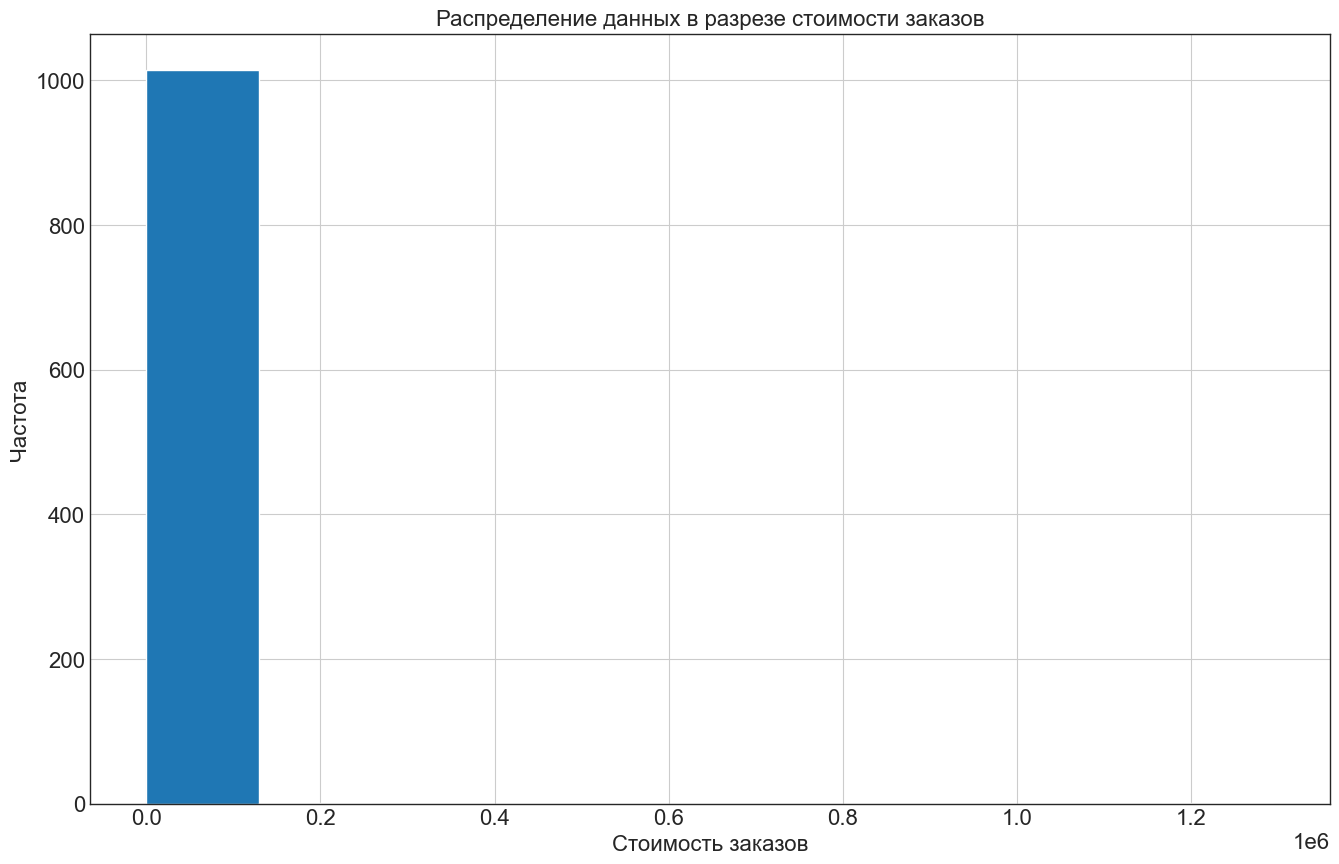

In [38]:
plt.hist(orders['revenue']) 
plt.title('Распределение данных в разрезе стоимости заказов')
plt.xlabel('Стоимость заказов')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

На гистограмме не видно других столбцов, но мы видим длинный хвост к значениям 1.2. Построим другой график:

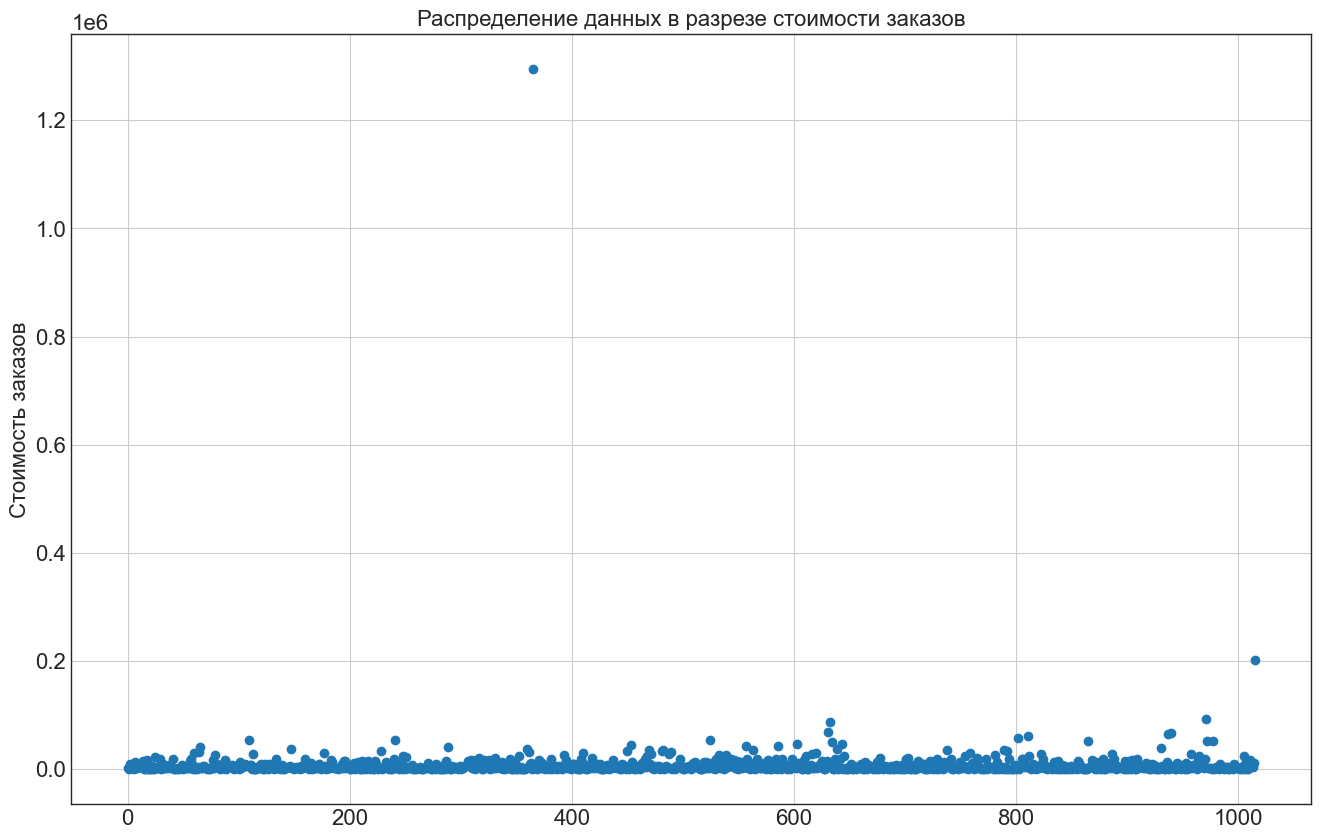

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Распределение данных в разрезе стоимости заказов')
plt.ylabel('Стоимость заказов')
plt.grid(True)
plt.show()

Мы видим сильные выбросы в районе 1.2 и 0.2. - их точно исключим из исследования, но есть ряд значений лежащих на уровне 0.1 и чуть ниже его. Считать ли эти значения аномальными? Проверим методом percentile() библиотеки Numpy. Принято отсеивать от 1% до 5% наблюдений с крайними значениями.  

In [40]:
np.percentile(orders['revenue'], [90, 96, 99])

array([17990., 30649., 53904.])

Только у 4% пользователей заказы дороже 30649, и только у одного процента дороже 53904. Возмем за верхнюю границу ограничение в 30649.

С выбросами в среднем чеке определились, теперь проверим второй показатель, выбросы в котором могут сильно влиять на графики и наше восприятие: количество заказов каждого пользователя.

In [41]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


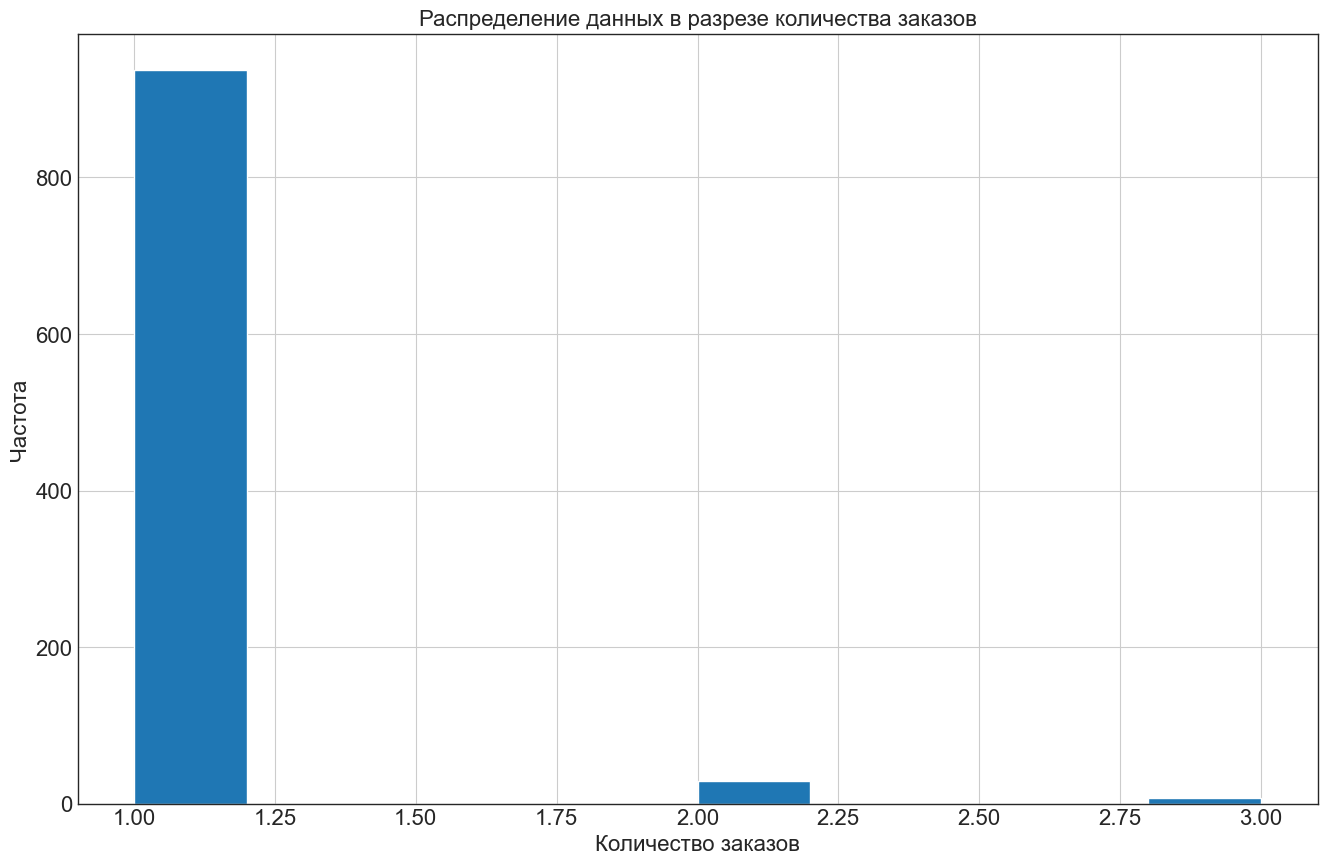

In [42]:
plt.hist(ordersByUsers['orders']) 
plt.title('Распределение данных в разрезе количества заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

В основном у пользователей 1 заказ, но встречаются значения в 2 или 3 заказа. Посмотрим на другой график:

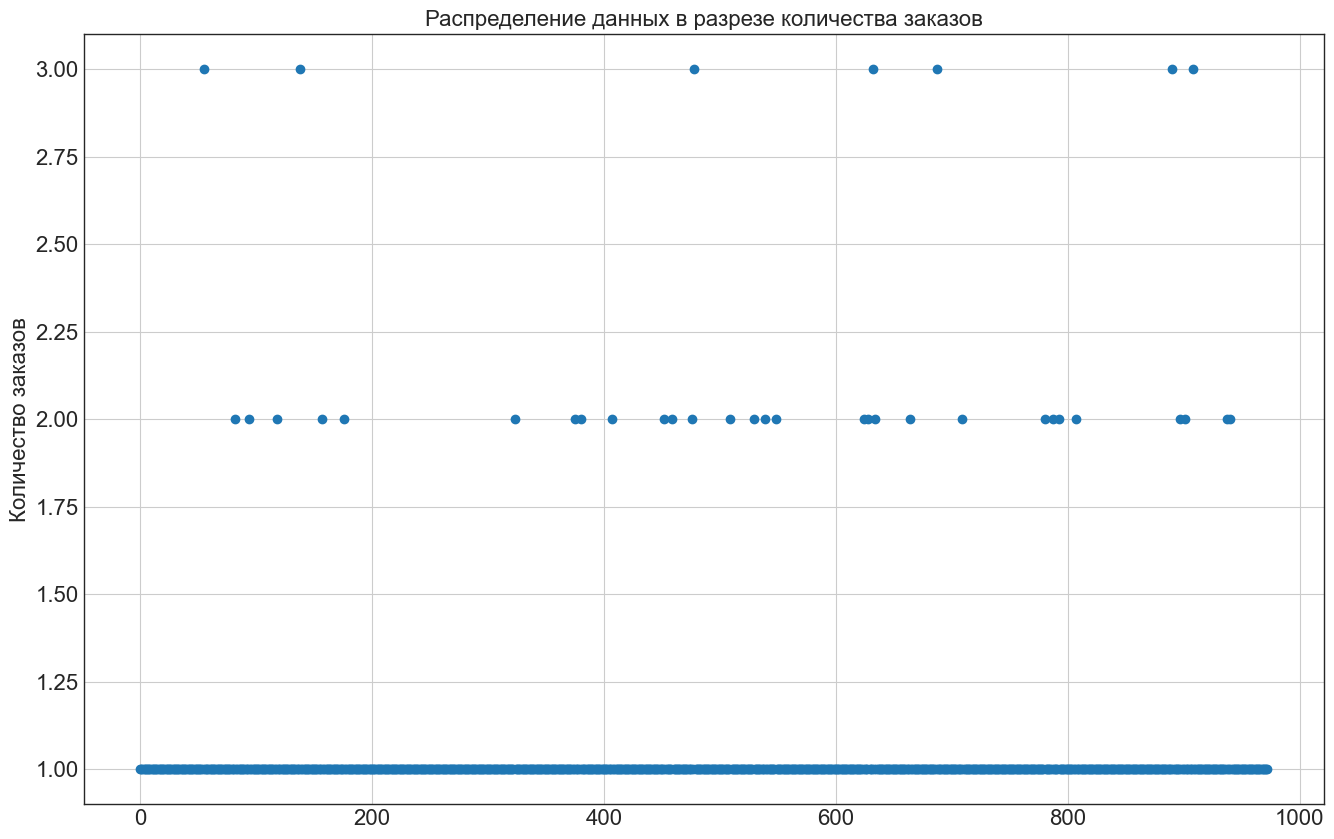

In [43]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Распределение данных в разрезе количества заказов')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

Да, есть пользователи с 2 и 3 заказами. Считать ли их аномальными?

In [44]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 1., 2.])

Не более 1% пользователей оформляли больше 2 заказов. Возьмем верхний потолок в 2 заказа.

### 4. Статистические тесты. <a id="step_four"></a>

##### 4.1. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. <a id="step_four_1"></a>

H0: Среднее количество заказов на посетителя группы В не отличается от среднего группы А.

H1: Среднее количество заказов на посетителя групп В и А различны.

In [45]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]), '- p-value')

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1), '- отличие среднего количества заказов на посетителя группы В от среднего группы А')

0.011 - p-value
0.160 - отличие среднего количества заказов на посетителя группы В от среднего группы А


Вывод: По «сырым» данным различия в среднем количестве заказов групп A и B есть. 
Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. 
Относительный выигрыш группы B равен 16% — второе число в выводе (то есть среднее количество заказов в группе В на 16% больше, чем в группе А)

##### 4.2. Посчитаем статистическую значимость различий в среднем чеке заказов между группами по «сырым» данным. <a id="step_four_2"></a>

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [46]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]), '- p-value')
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1), ) 

0.829 - p-value
0.287


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Принимаем нулевую гипотезу - средние чеки двух групп не отличаются друг от друга. Отличие же среднего чека группы B от среднего чека группы A почти на 29% статистически не значимо, так как получено случайно из-за выбросов. Посмотрим на эти же значения по чистым данным и сравним их позже.

Пришло время посмотреть на данные, очищенные от аномальных значений.

##### 4.3. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. <a id="step_four_3"></a>

Сделаем срезы пользователей с аномальными значениями: числом заказов больше 3 — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [47]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > (np.percentile(ordersByUsers['orders'], [90, 95, 99]) [2])]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > (np.percentile(ordersByUsers['orders'], [90, 95, 99]) [2])]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > (np.percentile(orders['revenue'], [90, 96, 99]) [1])]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.

Сформулируем стат. гипотезы: 

Н0: Среднее количество заказов на посетителя в группе В не отличается (или равно) среднему количеству заказов на посетителя в группе А. 

Н1: Среднее количество заказов на посетителя в группах В и А различается.

In [48]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]), '- p-value')
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1), '- отличие среднего количества заказов на посетителя группы В от среднего группы А') 

0.007 - p-value
0.194 - отличие среднего количества заказов на посетителя группы В от среднего группы А


Вывод: По «очищенным» данным различия в среднем количестве заказов групп A и B есть. Первое число — p-value = 0.007 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 19% — второе число в выводе (то есть среднее количество заказов в группе В на 19% больше, чем в группе А). Мы получили те же результаты, что и по сырым данным, с небольшими отклонениями.

##### 4.4. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. <a id="step_four_4"></a>

Н0: Средний чек в группе В не отличается (или равен) среднему чеку в группе А. 

Н1: Средний чек в группах В и А различается.

In [49]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    ), '- P-value'
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    ), '- отличие среднего чека группы В от среднего чека группы А'
) 

0.860 - P-value
0.001 - отличие среднего чека группы В от среднего чека группы А


P-value стал еще больше 0.86. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. А вот разница среднего чека группы B относительно среднего чека группы A сильно изменилась. Если по сырым данным средний чек группы В был выше среднего чека группы А на 29%, то по очищенным данным средний чек группы В стал практически равным среднему чеку группы А.

Теперь посмотрим на то, как изменяться графики по отфильтрованным данным.

In [50]:
orders1 = orders.query('visitorId not in @abnormalUsers')

In [51]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders1[orders1['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders1[orders1['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data1 = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

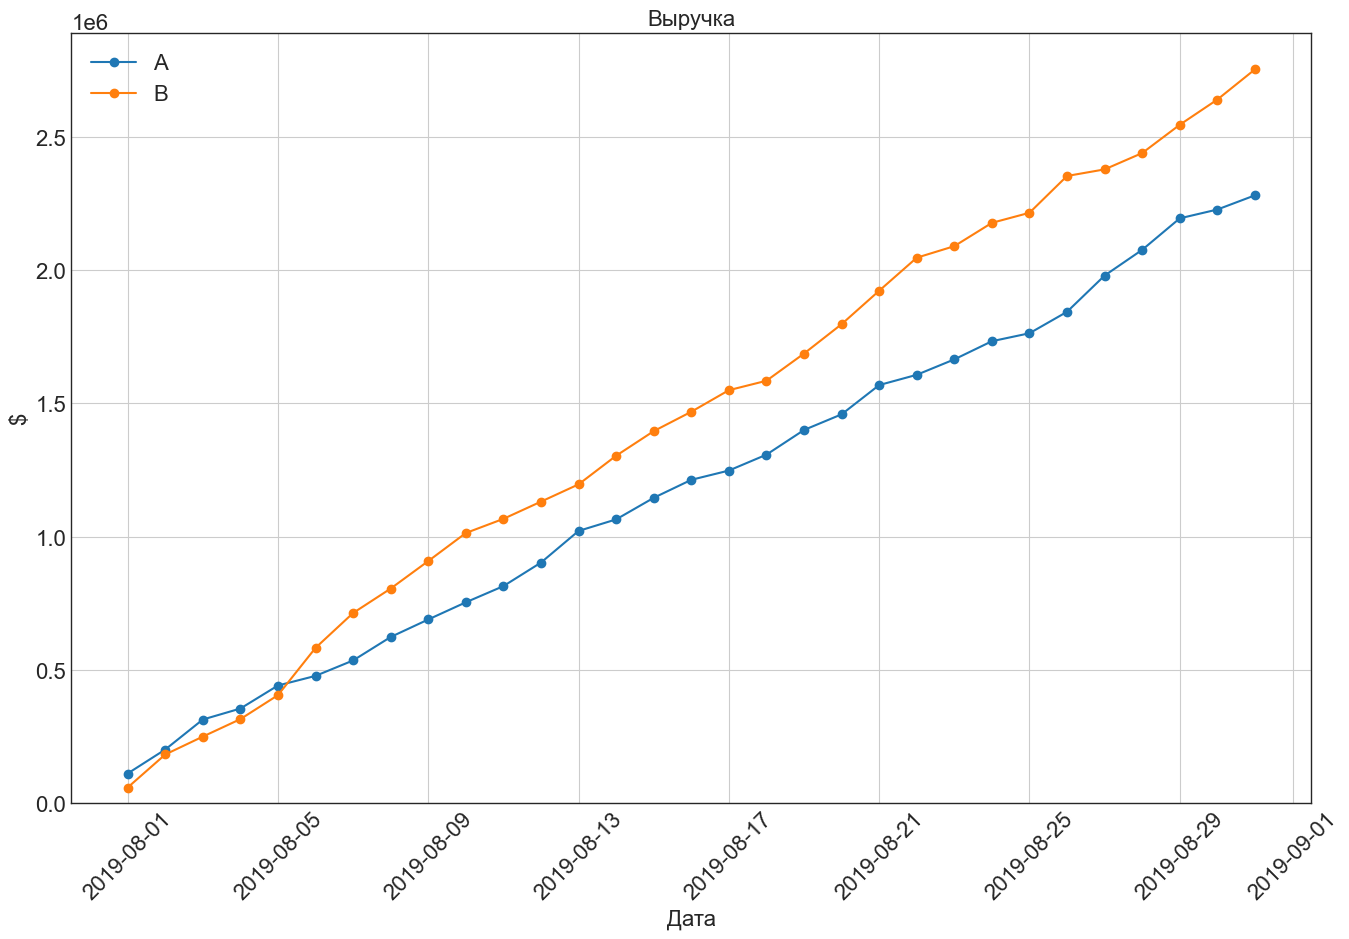

In [52]:
# Строим график выручки группы А
plt.plot(data1['date'], data1['revenueCummulativeA'], 'o-', label='A')

# Строим график выручки группы B
plt.plot(data1['date'], data1['revenueCummulativeB'], 'o-', label='B')
plt.ylabel('$')
plt.xlabel('Дата')
plt.title('Выручка')
plt.ylim(bottom=0)
plt.legend() 
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

В графике пропал резкий скачок группы В. Посмотрим на относительный график.

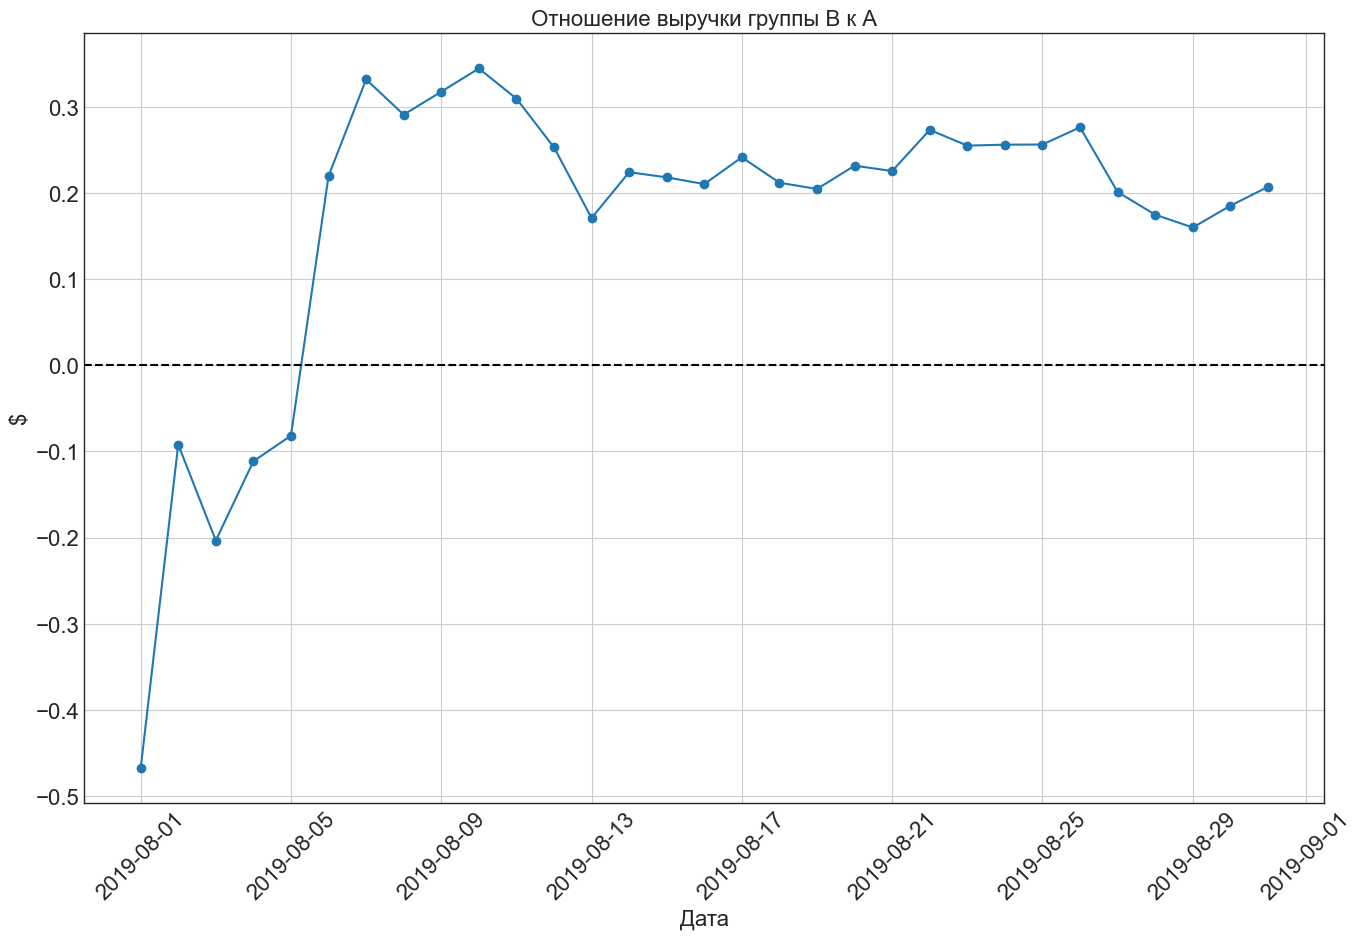

In [53]:
# cтроим график
plt.plot(data1['date'], data1['revenueCummulativeB']/data1['revenueCummulativeA']-1, 'o-')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('$')
plt.xlabel('Дата')
plt.title('Отношение выручки группы В к А')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

Теперь мы с уверенностью можем заявить, что группа В обогнала по кумулятивной выручке группу А. К концу исследования графики стали более стабильными и устойчивыми - можем заявить, что данных наблюдений достаточно для того, чтобы сделать вывод о том, что выручка группы В опережает выручку группы А.

Просто посмотрим на остальные графики (без комментариев), скорее всего графики станут более стабильными и установится стабильное отношение графиков.

Посмотрим кумулятивный средний чек.

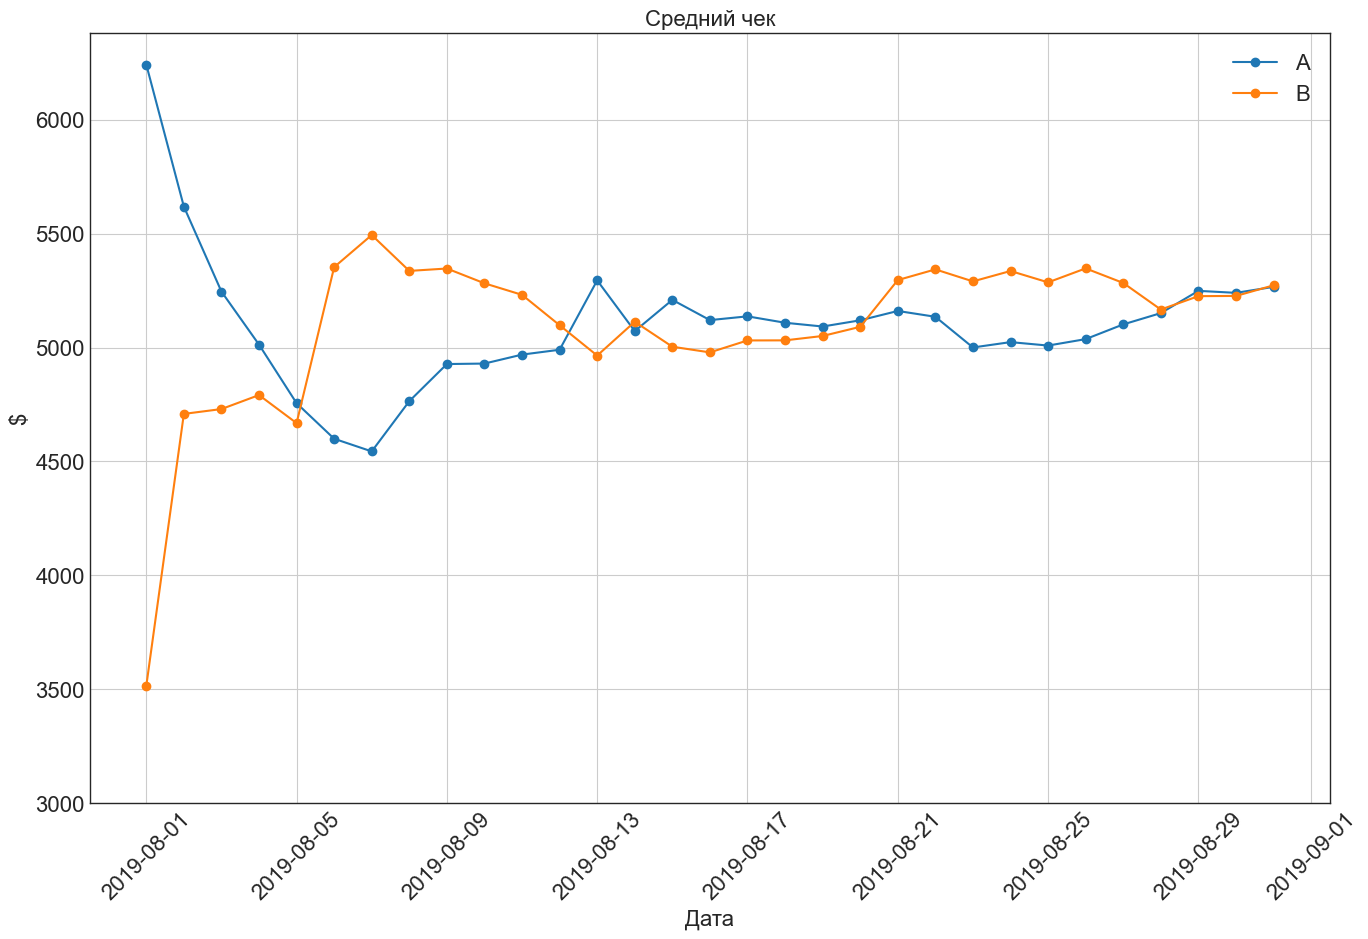

In [54]:
plt.plot(data1['date'], data1['revenueCummulativeA']/data1['ordersCummulativeA'], 'o-', label='A')
plt.plot(data1['date'], data1['revenueCummulativeB']/data1['ordersCummulativeB'], 'o-', label='B')
plt.ylabel('$')
plt.xlabel('Дата')
plt.title('Средний чек')
plt.ylim(bottom=3000)
plt.legend() 
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

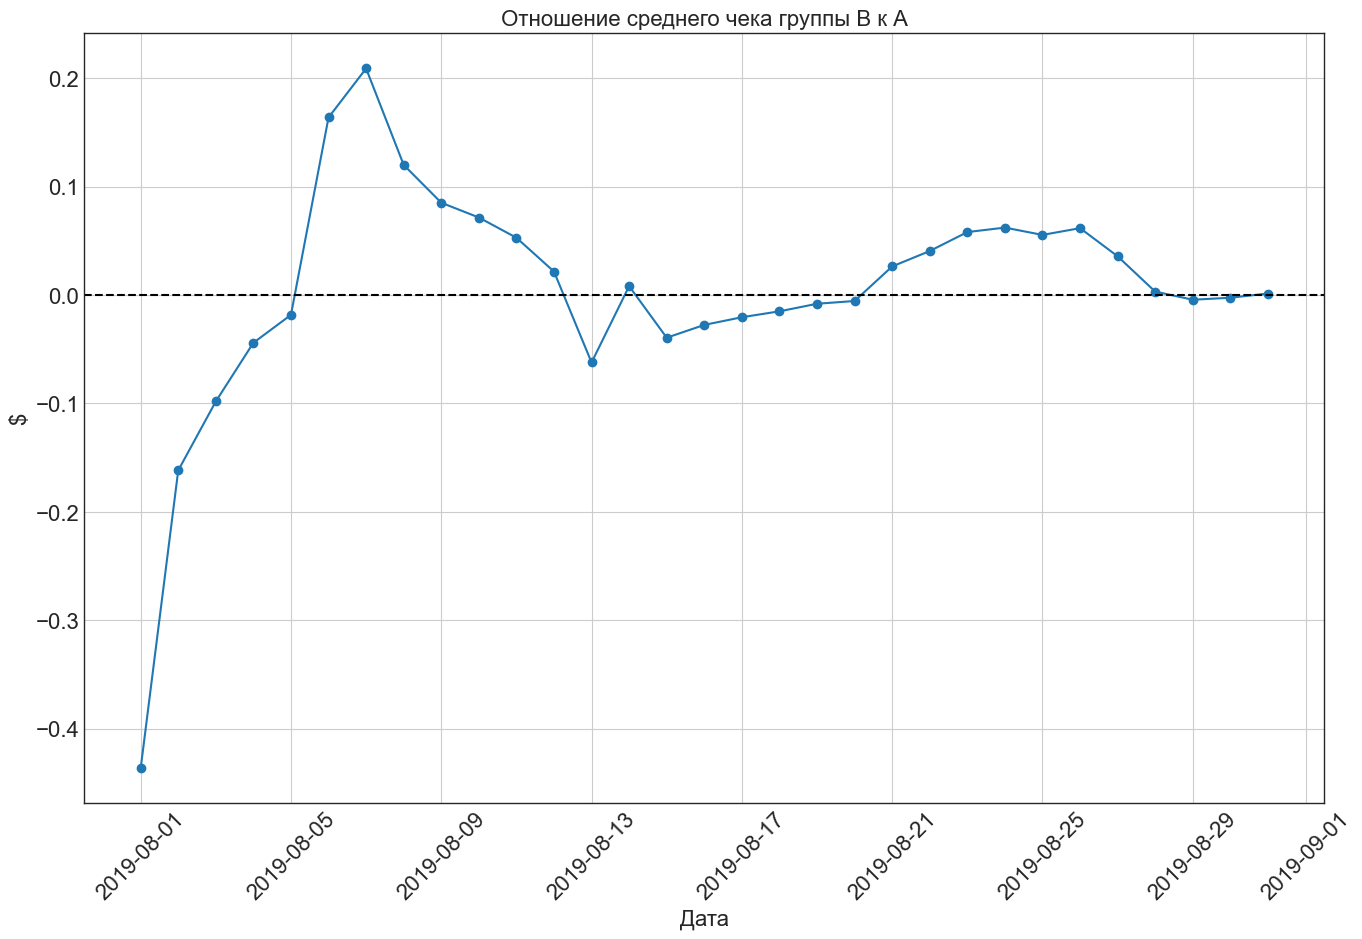

In [55]:
plt.plot(data1['date'], (data1['revenueCummulativeB']/data1['ordersCummulativeB'])/(data1['revenueCummulativeA']/data1['ordersCummulativeA'])-1, 'o-')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('$')
plt.xlabel('Дата')
plt.title('Отношение среднего чека группы В к А')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

График среднего чека сильно изменился на чистых данных, как нам выше показал тест, то средний чек группы В вышел равным группы А, а до очистки средний чек группы В был на 29% выше.

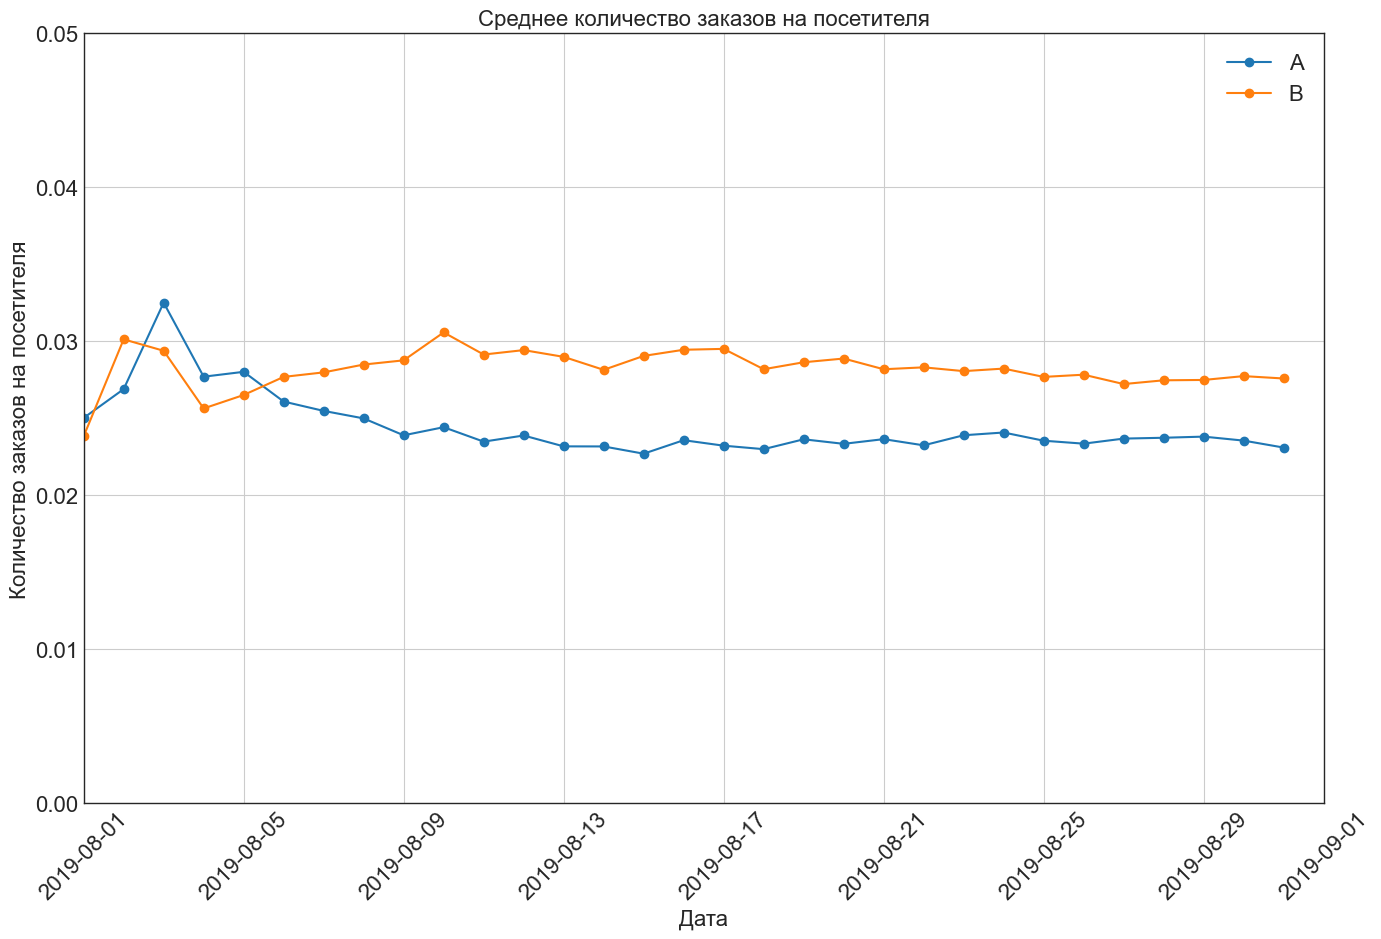

In [56]:
plt.plot(data1['date'], data1['ordersCummulativeA']/data1['visitorsCummulativeA'], 'o-', label='A')
plt.plot(data1['date'], data1['ordersCummulativeB']/data1['visitorsCummulativeB'], 'o-', label='B')
plt.ylabel('Количество заказов на посетителя')
plt.xlabel('Дата')
plt.title('Среднее количество заказов на посетителя')
plt.legend()
plt.axis([dt(2019, 8, 1), dt(2019, 9, 1), 0, 0.05])
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

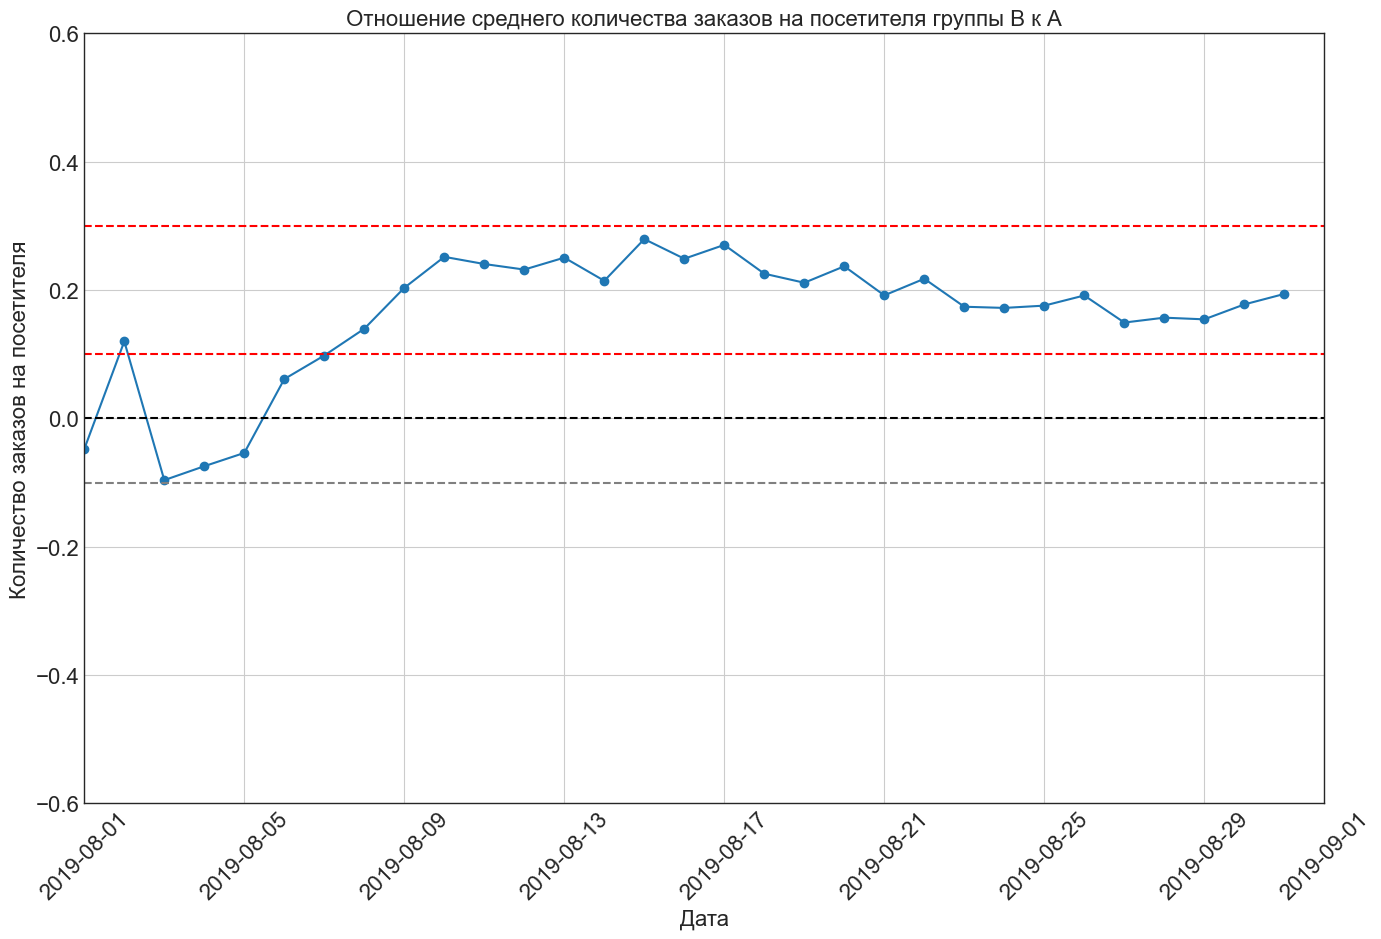

In [57]:
plt.plot(data1['date'], (data1['ordersCummulativeB']/data1['visitorsCummulativeB'])/(data1['ordersCummulativeA']/data1['visitorsCummulativeA'])-1, 'o-')
plt.ylabel('Количество заказов на посетителя')
plt.xlabel('Дата')
plt.title('Отношение cреднего количества заказов на посетителя группы В к А')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='red', linestyle='--')
plt.axhline(y=0.3, color='red', linestyle='--')
plt.axis([dt(2019, 8, 1), dt(2019, 9, 1), -0.6, 0.6])
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

График среднего количества заказов на посетител не сильно изменился, он был достаточно стабильным и на сырых данных.

### 4. Выводы по работе. <a id="step_five"></a> 

1. В ходе работы были импортированы все необходимые библиотеки, загружены и изучены файлы.
2. По каждому фрейму данных была проведена предобработка данных, найдены и обработаны аномалии и артефакты.
3. Провел приоритезацию гипотез по системам ICE и RICE, выделил наиболее приоритетные.
4. Визуализировал результаты A/B-теста, построил и проанализировал кумулятивные графики и размеры выборок, принял решение о том, что метрики "устаканились" и данных достаточно для стат. тестов. 
5. Очистил данные, провел стат. тесты и сделал выводы, что статистически значимые различия в среднем числе заказов между группами есть. Относительный выигрыш группы B равен почти 15%, то есть среднее количество заказов в группе В на 15% больше, чем в группе А. Причин считать что в среднем чеке есть различия, нет. То есть средний чек у групп равный. В связи с этим суммарная (кумулятивная) выручка у группы В выше чем у группы А (это же мы видим на "чистом" графике выше). Вариант В приносит компании больше выручки и заказов.